**STATISTICAL LEARNING AND NEURAL NETWORKS, A.A. 2022/2023**

**COMPUTER LAB 1** - k-NN classifier

**Duration: 6 hours**

**Exercise 1 - Synthetic dataset**

In this exercise, you will employ a synthetic dataset (file Lab1_Ex_1_Synthtetic.hdf5), containing labelled training data and test data for two classes. For each example the first two columns represent the features, while the last column represents the label.

Task: your task is to implement a k-NN classifier, which calculates the probability that a given test example belongs to each class, and outputs a class label as the class with the highest probability. You will evaluate the classifier performance computing the average classification accuracy (i.e. the fraction of test examples that have been classified correctly in respect to the full test set).

In particular, you should perform the following:

*   Train a k-NN classifier for different values of k.
*   Compare accuracy on the training set and the test set. Calculating accuracy of the training set means that you will have to classify each sample in the training set as if it were a test sample; one expects that classification of training samples will perform well, and this may also be used to validate your implementation. Accuracy is defined as the ratio between the number of test samples that are correctly classified, and the total number of test samples. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set. Create a second graph to show the evolution of the accuracy for different values of k over the train set and compare the two.

*   Identifying overfitting and underfitting in the obtained results. 

Note that, for this computer lab, you do not need to employ a validation set.

**Other indications:**
*   The student is required to implement the k-NN algorithm from scratch. Only the numpy library is allowed, while other libraries such as scikit_learn are forbidden.

## Excercise 1 ---------------------------------
#### KNN

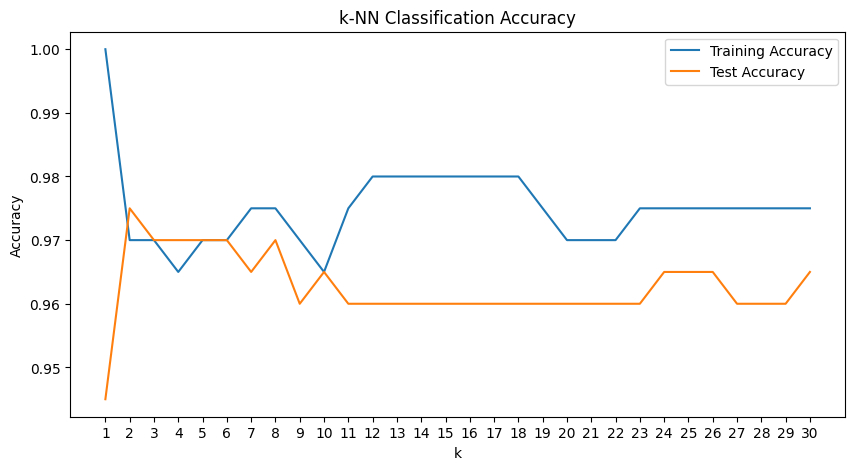

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
Dataset1 = h5py.File('Lab1_Ex_1_Synthtetic.hdf5', 'r')
Data = np.array(Dataset1.get('Dataset'))

Train_Set = Data[:200, :]
Test_Set = Data[200:, :]
#Implement a function to compute the Euclidean distance between two vectors, and one to implement the k-NN algorithm by:
#   - Taking a sample 
#   - Computing all the distances between the sample element and the elements of the training set
#   - sort the the training set based on the distances to the element (the use of functions like np.argsort is allowed)
#   - select the top k elements in terms of distance
#   - evaluate to which class the majority of these k elements belongs to (e.g., it is possible to use the function np.unique with the option return_counts=True and the function np.argmax)


def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def k_nn_classifier(sample, myData, k):
    distances = []
    for data_point in myData:
        distances.append((euclidean_distance(sample[:-1], data_point[:-1]), data_point[-1]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    # print(neighbors)
    classes, counts = np.unique([neighbor[-1] for neighbor in neighbors], return_counts=True)
    # print(classes, counts)
    return classes[np.argmax(counts)]

# Loop over different values of k and compute accuracies
train_accuracies = []
test_accuracies = []
ks = range(1, 31)  # Assuming you want to test k from 1 to 20
for k in ks:
    correct_train = 0
    correct_test = 0
    
    # Evaluate on training set
    for sample in Train_Set:
        predicted_class = k_nn_classifier(sample, Train_Set, k)
        if predicted_class == sample[-1]:
            correct_train += 1
            
    # Evaluate on test set
    for sample in Test_Set:
        predicted_class = k_nn_classifier(sample, Train_Set, k)
        if predicted_class == sample[-1]:
            correct_test += 1
    
    train_accuracies.append(correct_train / len(Train_Set))
    test_accuracies.append(correct_test / len(Test_Set))

# Plot accuracies
plt.figure(figsize=(10, 5))
plt.plot(ks, train_accuracies, label='Training Accuracy')
plt.plot(ks, test_accuracies, label='Test Accuracy')
plt.xticks(ks)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.title('k-NN Classification Accuracy')
plt.show()

## Excercise 2 ---------------------------------
#### Wine Testing using Linear Regression

In [ ]:
#Change the path to match the position of your file
#The Dataset can be loaded using thhe file option in Google Colab (the directory icon on the left)
Dataset1 = h5py.File('/content/Lab1_Ex_1_Synthtetic.hdf5')
Data = np.array(Dataset1.get('Dataset'))

Train_Set = Data[:200,:] 
Test_Set = Data[200:,:] 

#To be completed by the student

**Student's comments to exercise 1**

*Add comments to the results of Exercise 1 here (may use LateX for formulas if needed).*

**Exercise 2 - Wine dataset**

*Part 1*

In this exercise, a real problem will be examined. The dataset used in this exercise was derived from wine quality dataset from the work "*Modeling wine preferences by data mining from physicochemical properties*" by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 

For each element of the dataset 11 features are provided, representing different wine characteristics, such as density, pH and alcholic content, and the final column consists of a quality evaluation on a scale from 1 to 10. More information can be found at https://archive.ics.uci.edu/ml/datasets/wine+quality.

A subset of the dataset containing 400 elements is provided. Create a training set and a test set of 200 samples each. The objective is to: 
*   Predict the wine quality over the test set using the k-NN algorithm and evaluating the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identifying overfitting and underfitting in the obtained results. 

*Part 2*

The prediction of the wine quality could also be framed as a regression. Estimate the accuracy and the Mean Square Error achieved using linear resgression. For this task is possible to use the library sklearn and the function linear_model.LinearRegression() 

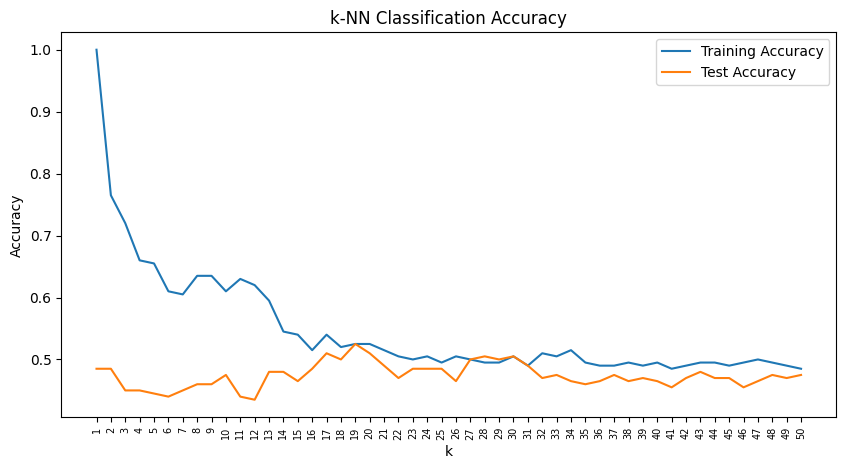

In [16]:
#Part 1

Dataset2 = h5py.File('Lab1_Ex_2_wine.hdf5')

Data = np.array(Dataset2.get('Dataset'))

Train_Set = Data[:200,:] 
Test_Set = Data[200:,:] 

#To be completed by the student

#Part 1

# Loop over different values of k and compute accuracies
train_accuracies = []
test_accuracies = []
ks = range(1, 51)  # Assuming you want to test k from 1 to 30
for k in ks:
    correct_train = 0
    correct_test = 0
    
    # Evaluate on training set
    for sample in Train_Set:
        predicted_class = k_nn_classifier(sample, Train_Set, k)
        if predicted_class == sample[-1]:
            correct_train += 1
            
    # Evaluate on test set
    for sample in Test_Set:
        predicted_class = k_nn_classifier(sample, Train_Set, k)
        if predicted_class == sample[-1]:
            correct_test += 1
    
    train_accuracies.append(correct_train / len(Train_Set))
    test_accuracies.append(correct_test / len(Test_Set))

# Plot accuracies
plt.figure(figsize=(10, 5))
plt.plot(ks, train_accuracies, label='Training Accuracy')
plt.plot(ks, test_accuracies, label='Test Accuracy')
plt.xticks(ks, rotation=90, fontsize=7)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.title('k-NN Classification Accuracy')
plt.show()
#To be completed by the student

In [ ]:
#Part 2
from sklearn import linear_model
clf = linear_model.LinearRegression()

#To be completed by the student

**Student's comments to exercise 2**

*Add comments to the results of Exercise 2 here (may use LateX for formulas if needed).*

## Excercise 3 ---------------------------------
#### Speech Signals

**Exercise 3: Phoneme Dataset**

In this exercise the Phoneme dataset is examined https://catalog.ldc.upenn.edu/LDC93s1. Each line represents 256 samples gathered at a 16 kHz of different speech signals. The objective is to classify wether the sound emitted is a "sh", "iy", "dcl", "aa", "ao" phoneme.  

Again, a subset of the dataset containing 400 elements is provided. Create a training set and a test set of 200 samples each. 


*   Classify the samples which compose the test set using the k-NN algorithm and evaluate the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identifying overfitting and underfitting in the obtained results. 

In [ ]:
Dataset3 = h5py.File('/content/Lab1_Ex_3.hdf5')

Data = np.array(Dataset3.get('Dataset'))

Train_Set = Data[:200,:] 
Test_Set = Data[200:,:] 

#To be completed by the student

**Student's comments to exercise 3**

*Add comments to the results of Exercise 3 here (may use LateX for formulas if needed).*